In [159]:
import os
import librosa
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#References from class lectures and slides

# STEP 1: Splitting into Training and Testing sets w/ 70/30

In [160]:
Happy = "data_folder/happy/"
Fear = "data_folder/fear/"
Angry = "data_folder/angry/"
Sad = "data_folder/sad/"

dataHappy = librosa.util.find_files(Happy)
dataFear = librosa.util.find_files(Fear)
dataAngry = librosa.util.find_files(Angry)
dataSad = librosa.util.find_files(Sad)

In [161]:
dataHappy = np.asarray(dataHappy)
dataFear = np.asarray(dataFear)
dataAngry = np.asarray(dataAngry)
dataSad = np.asarray(dataSad)

In [162]:
targetSad = np.full(100, 1) # Sad target array 1s

trainSad = train_test_split(dataSad, targetSad, test_size = 0.7, shuffle=True, random_state=5)

trainSad, testSad, targetSad, tSad = train_test_split(dataSad, targetSad, test_size = 0.3, shuffle=True, random_state=5)

targetAngry = np.full(100, 2) # Angry target array 2s

trainAngry = train_test_split(dataAngry, targetAngry, test_size = 0.7, shuffle=True, random_state=5)

trainAngry, testAngry, targetAngry, tAngry = train_test_split(dataAngry, targetAngry, test_size = 0.3, shuffle=True, random_state=5)

targetFear = np.full(100, 3) #Fear target array 3s

trainFear = train_test_split(dataFear, targetFear, test_size = 0.7, shuffle=True, random_state=5)

trainFear, testFear, targetFear, tFear = train_test_split(dataFear, targetFear, test_size = 0.3, shuffle=True, random_state=5)

targetHappy = np.full(100, 4) #happy target array 4s

trainHappy = train_test_split(dataHappy, targetHappy, test_size = 0.7, shuffle=True, random_state=5)

trainHappy, testHappy, targetHappy, tHappy = train_test_split(dataHappy, targetHappy, test_size = 0.3, shuffle=True, random_state=5)

np.info(trainHappy)

class:  ndarray
shape:  (70,)
strides:  (248,)
itemsize:  248
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e26aa44cf0
byteorder:  little
byteswap:  False
type: <U62


In [163]:
np.info(trainFear)

class:  ndarray
shape:  (70,)
strides:  (240,)
itemsize:  240
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e26c10faf0
byteorder:  little
byteswap:  False
type: <U60


In [164]:
np.info(trainAngry)

class:  ndarray
shape:  (70,)
strides:  (248,)
itemsize:  248
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e270065770
byteorder:  little
byteswap:  False
type: <U62


In [165]:
np.info(trainSad)

class:  ndarray
shape:  (70,)
strides:  (232,)
itemsize:  232
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e2731950c0
byteorder:  little
byteswap:  False
type: <U58


In [166]:
train = np.append(trainSad, trainAngry)
train = np.append(train, trainFear)
train = np.append(train, trainHappy)

np.info(train)

class:  ndarray
shape:  (280,)
strides:  (248,)
itemsize:  248
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e27c969e20
byteorder:  little
byteswap:  False
type: <U62


In [167]:
target = np.append(targetSad, targetAngry)
target = np.append(target, targetFear)
target = np.append(target, targetHappy)

np.info(target)

class:  ndarray
shape:  (280,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e275f0ce40
byteorder:  little
byteswap:  False
type: int32


In [168]:
test = np.append(testSad, testAngry)
test = np.append(test, testFear)
test = np.append(test, testHappy)

np.info(test)

class:  ndarray
shape:  (120,)
strides:  (248,)
itemsize:  248
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e270098ae0
byteorder:  little
byteswap:  False
type: <U62


In [169]:
t = np.append(tSad, tAngry)
t = np.append(t, tFear)
t = np.append(t, tHappy)

np.info(t)

class:  ndarray
shape:  (120,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1e27613fa00
byteorder:  little
byteswap:  False
type: int32


# Step 2:  Exploratory Data Analysis

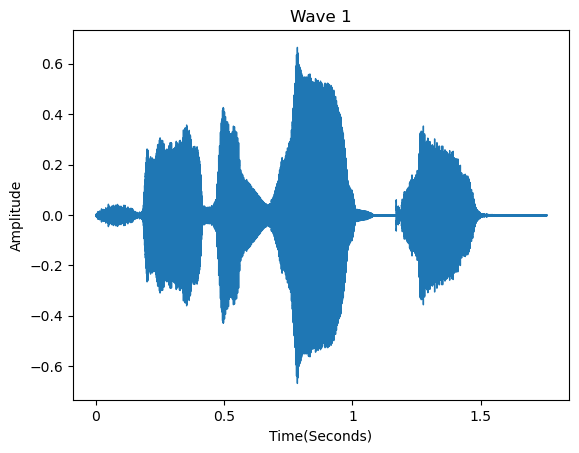

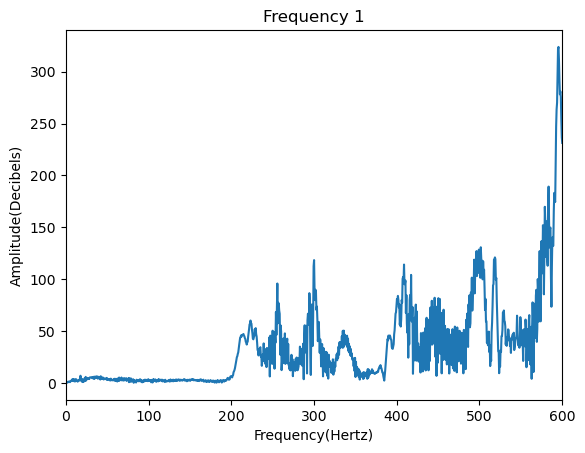

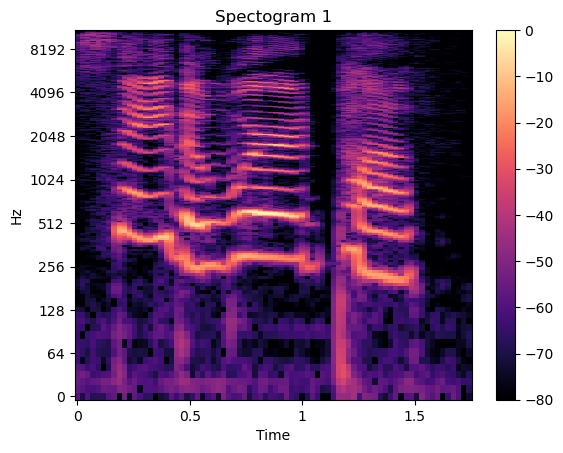

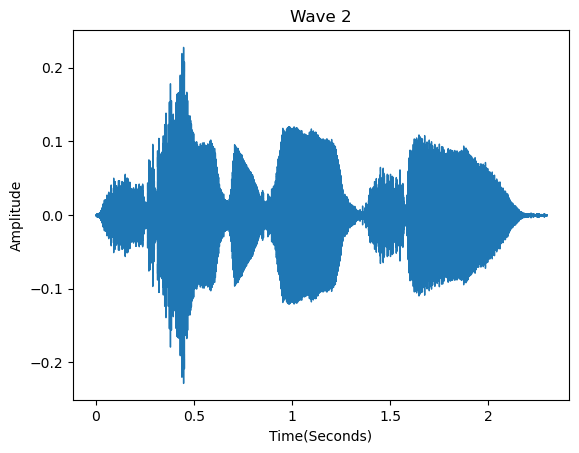

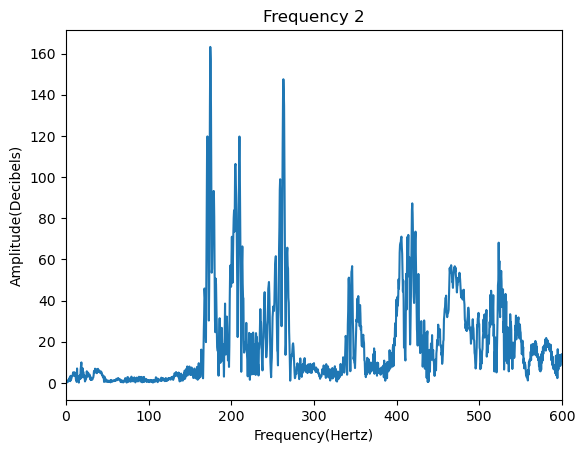

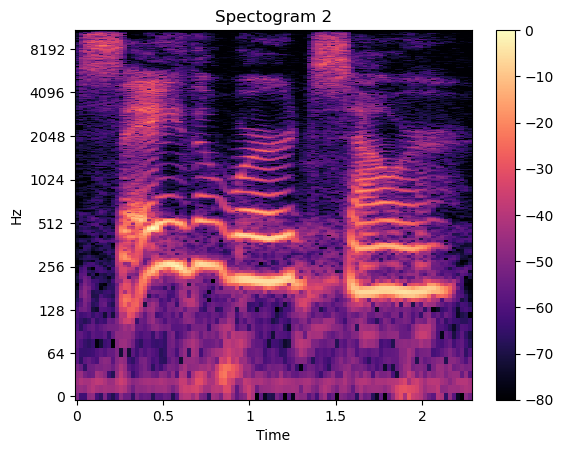

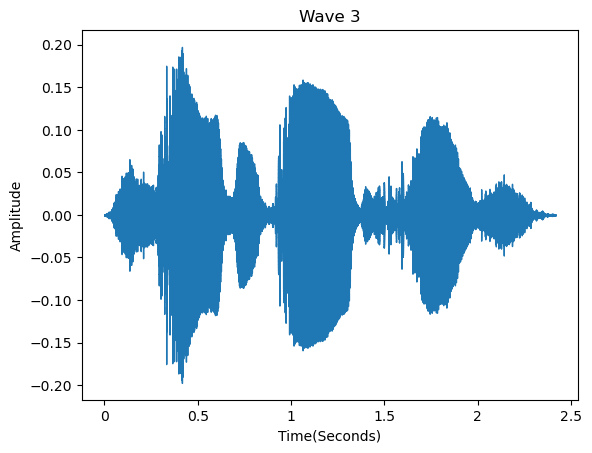

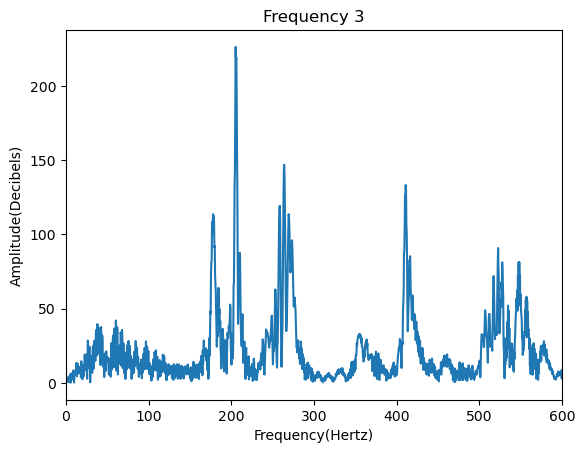

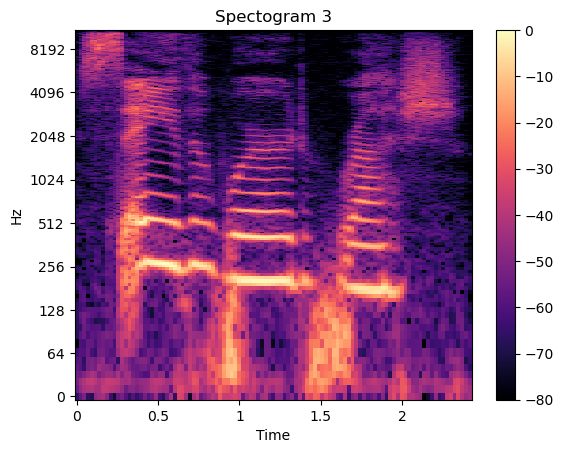

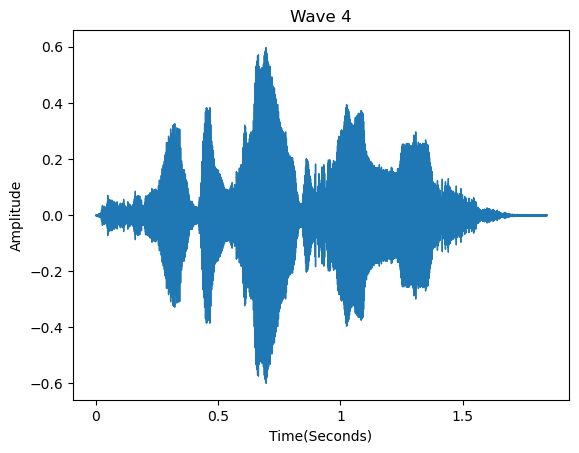

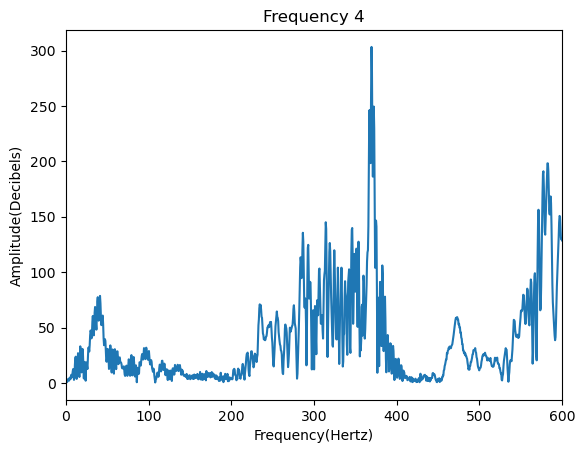

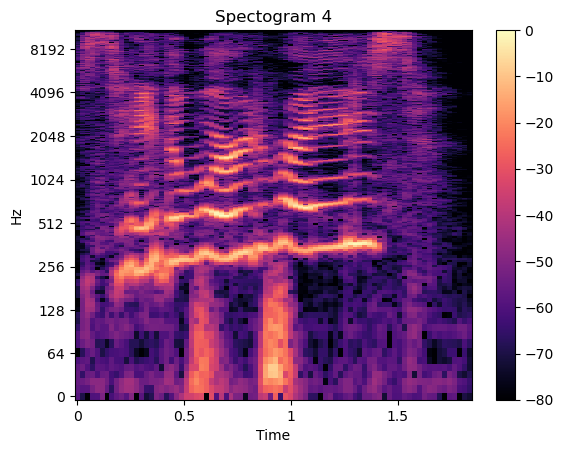

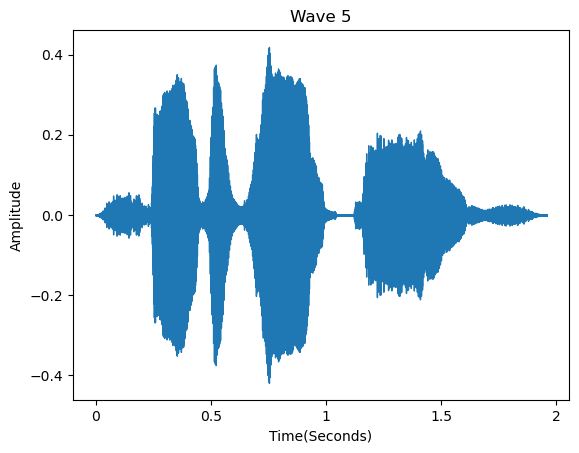

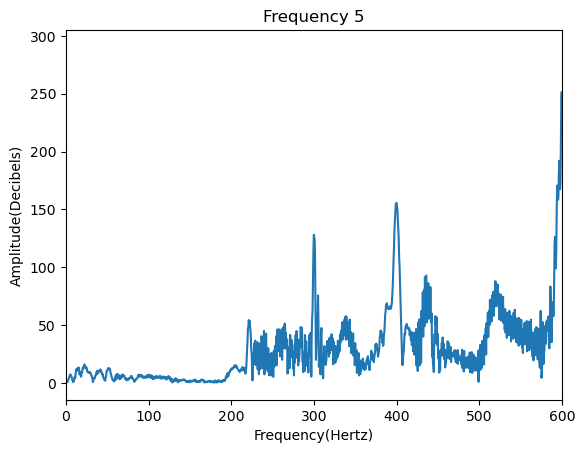

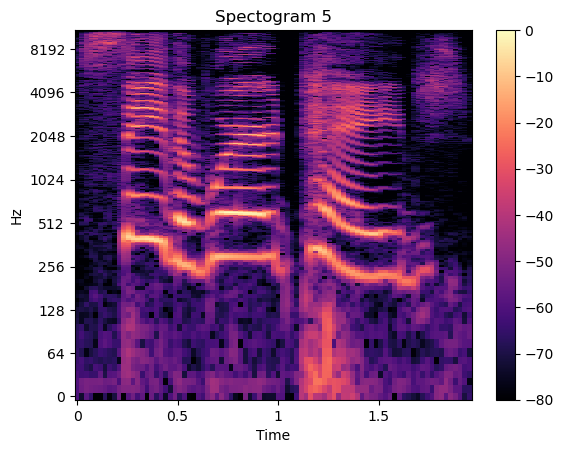

In [170]:
randomNums = random.sample(range(280), 5) # 5 samples
trainRandom = np.array([train[i] for i in randomNums])

for i in range(len(trainRandom)): 
    #wave
    signal, sample_rate = librosa.load(trainRandom[i])   
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time(Seconds)')
    plt.ylabel('Amplitude')
    plt.title('Wave ' + str(i+1))
    plt.show()
    
    #frequency
    signal, sample_rate = librosa.load(trainRandom[i])   
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k/T

    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.title('Frequency ' + str(i+1))
    plt.xlabel("Frequency(Hertz)")
    plt.ylabel("Amplitude(Decibels)")
    plt.xlim([0, 600])
    plt.show()
    
    #spectogram
    signal, sample_rate = librosa.load(trainRandom[i])  
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(4)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.title('Spectogram ' + str(i+1))
    plt.colorbar()
    plt.show()

# Step 3/4: Acoustic Feature Extraction/Post-Processing

In [171]:
trainFinal = []
#melspectogram, chroma, mfcc, and zero crossing
for X in train:
    final = np.array([])
    signal, sample_rate = librosa.load(X)
    
    melspectogram = np.mean(librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12).T, axis=0)
    final = np.hstack((final, melspectogram))
    
    stft = np.abs(librosa.stft(signal))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    final = np.hstack((final, chroma))
    
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12).T, axis=0)
    final = np.hstack((final, mfcc))
    
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    final = np.hstack((final, zcr))
    
    trainFinal.append(final)
    
trainFinal = np.array(trainFinal)
trainFinal[:4]

array([[ 3.61820912e+00,  1.18973148e+00,  1.68646425e-01,
         1.13091115e-02,  6.53343927e-03,  5.64533100e-03,
         3.45193874e-03,  3.84299434e-03,  3.06093041e-03,
         3.21981218e-03,  1.88868528e-03,  5.43775875e-03,
         3.84720355e-01,  4.10774648e-01,  3.58071715e-01,
         2.99993813e-01,  3.10701817e-01,  3.96676242e-01,
         4.45838928e-01,  3.84745359e-01,  4.20322418e-01,
         3.80334824e-01,  2.99752802e-01,  3.20702821e-01,
        -4.15317749e+02,  7.86567535e+01,  2.79715748e+01,
         3.67710876e+01,  6.57485247e+00,  8.47767067e+00,
        -3.31289959e+00, -1.81792202e+01,  6.25463438e+00,
        -1.02130556e+01, -5.36201477e+00,  1.70036122e-01,
         1.06953125e-01],
       [ 2.35992289e+00,  1.44913459e+00,  1.87268972e-01,
         4.55764830e-02,  2.04750560e-02,  5.17681055e-03,
         2.67795031e-03,  7.69800413e-03,  6.37985393e-03,
         3.29542276e-03,  2.80357827e-03,  1.13972956e-02,
         5.14705479e-01,  4.86

In [172]:
testFinal = []
#melspectogram, chroma, mfcc, and zero crossing
for X in test:
    final = np.array([])
    signal, sample_rate = librosa.load(X)
    
    melspectogram = np.mean(librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12).T, axis=0)
    final = np.hstack((final, melspectogram))
    
    stft = np.abs(librosa.stft(signal))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    final = np.hstack((final, chroma))
    
    mfcc = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12).T, axis=0)
    final = np.hstack((final, mfcc))
    
    zeroCrossing = np.mean(librosa.feature.zero_crossing_rate(y=signal).T, axis=0)
    final = np.hstack((final, zeroCrossing))
    
    testFinal.append(final)
    
testFinal = np.array(testFinal)
testFinal[:4]

array([[ 4.39820099e+00,  2.80760241e+00,  3.58350903e-01,
         2.47332845e-02,  9.74644814e-03,  2.03364100e-02,
         4.19011572e-03,  7.91886635e-03,  4.13460704e-03,
         4.18190612e-03,  4.57265228e-03,  2.28652786e-02,
         4.32194710e-01,  5.91797829e-01,  5.95031559e-01,
         4.23237979e-01,  3.90834719e-01,  3.71795624e-01,
         4.30881232e-01,  4.25814748e-01,  4.38746572e-01,
         5.24806619e-01,  4.41504896e-01,  3.74484748e-01,
        -3.88513824e+02,  6.32660713e+01,  3.00256557e+01,
         4.22324333e+01,  2.48163843e+00,  1.84950173e+00,
        -1.46746123e+00, -6.95303392e+00, -5.55093229e-01,
        -8.89564419e+00, -4.94186687e+00,  2.87320876e+00,
         1.48309005e-01],
       [ 2.95721841e+00,  1.07835674e+00,  1.04290247e-01,
         1.18261836e-02,  8.15219432e-03,  4.32066666e-03,
         2.36841361e-03,  2.86012795e-03,  1.38393161e-03,
         1.46920222e-03,  2.10581487e-03,  5.54993516e-03,
         5.01578152e-01,  4.94

# Step 5/6: audio emotion recognition model / Model evaluation

In [181]:
mParameters = {
    'max_iter': 500, 
}

multiLayer = MLPClassifier(**mParameters)
navieBayes = GaussianNB()
randomForest = RandomForestClassifier()
supportVec = SVC(probability=True)
nearNeighbor = KNeighborsClassifier(n_neighbors = 8)

In [182]:
multiLayer.fit(trainFinal, target)
navieBayes.fit(trainFinal, target)
randomForest.fit(trainFinal, target)
supportVec.fit(trainFinal, target)
nearNeighbor.fit(trainFinal, target)

KNeighborsClassifier(n_neighbors=8)

In [187]:
navieBayesPredicted = navieBayes.predict(testFinal)
navieBayesPredictionProbability = navieBayes.predict_proba(testFinal)

randomForestPredicted = randomForest.predict(testFinal)
randomForestPredictionProbability = randomForest.predict_proba(testFinal)

supportVecPredicted = supportVec.predict(testFinal)
supportVecPredictionProbability = supportVec.predict_proba(testFinal)

nearNeighborPredicted = nearNeighbor.predict(testFinal)
nearNeighborPredictionProbability = nearNeighbor.predict_proba(testFinal)

multiLayerPredicted = multiLayer.predict(testFinal)
multiLayerPredictionProbability = multiLayer.predict_proba(testFinal)

Random Forest Classifier Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       0.97      1.00      0.98        30
           4       1.00      0.97      0.98        30

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



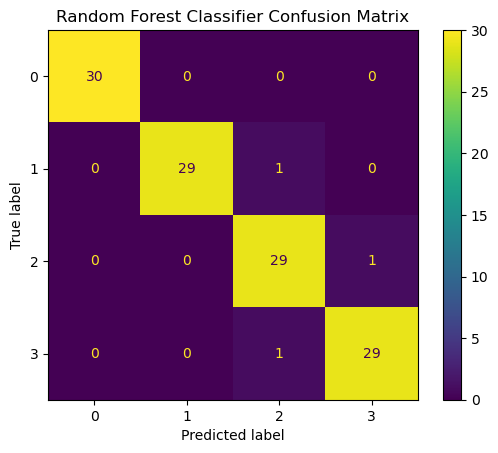

Naive Bayes Classifier Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       0.94      0.97      0.95        30
           4       0.97      0.97      0.97        30

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.98       120



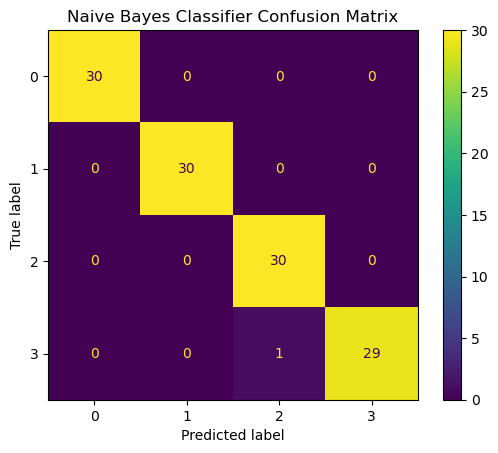

K-Nearest Neighbors Classifier Report
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       0.90      0.93      0.92        30
           3       0.97      0.93      0.95        30
           4       0.97      0.93      0.95        30

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



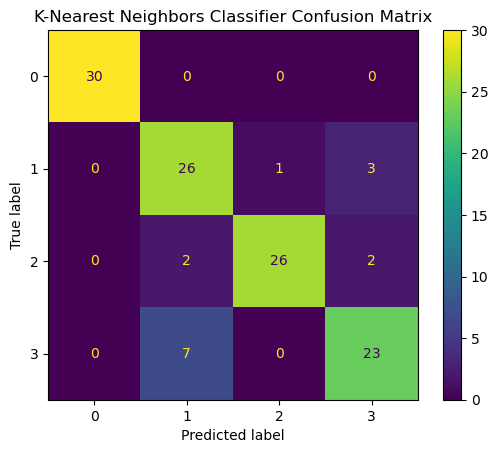

Multi-Layer Perception Classifier Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       0.96      0.90      0.93        30
           3       0.87      0.90      0.89        30
           4       0.94      0.97      0.95        30

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



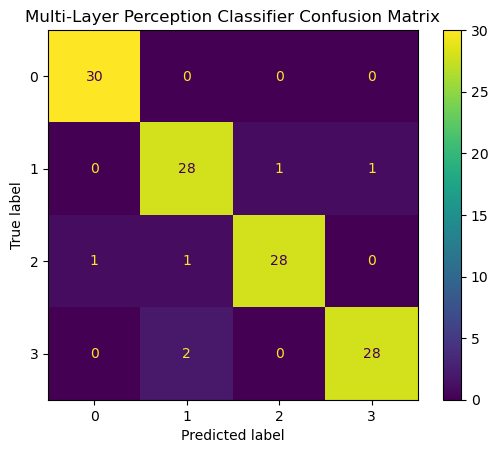

Support Vector Machine Classifier Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       0.74      0.87      0.80        30
           3       0.96      0.87      0.91        30
           4       0.82      0.77      0.79        30

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



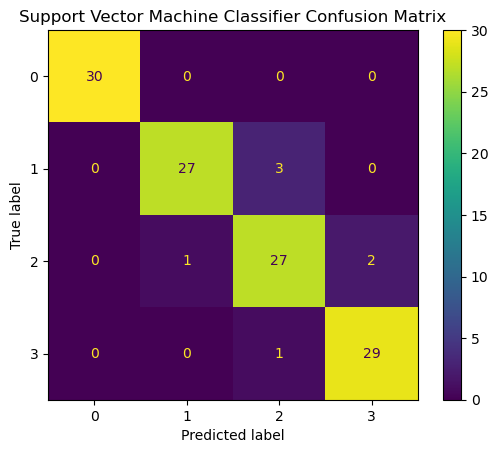

In [207]:
models = ['Random Forest Classifier', 'Naive Bayes Classifier', 'K-Nearest Neighbors Classifier', 'Multi-Layer Perception Classifier', 'Support Vector Machine Classifier']
predictions = [navieBayesPredicted, randomForestPredicted, supportVecPredicted, nearNeighborPredicted, multiLayerPredicted]
predictionProbabilities = [navieBayesPredictionProbability, randomForestPredictionProbability, supportVecPredictionProbability, nearNeighborPredictionProbability, multiLayerPredicted]

for model, prediction, pred_proba in zip(models, predictions, predictionProbabilities):
    print(f"{model} Report")
    if model == 'Random Forest Classifier':
        print(classification_report(t, randomForestPredicted))
    elif model == 'Naive Bayes Classifier':
        print(classification_report(t, navieBayesPredicted))
    elif model == 'K-Nearest Neighbors Classifier':
        print(classification_report(t, nearNeighborPredicted))
    elif model == 'Multi-Layer Perception Classifier':
        print(classification_report(t, multiLayerPredicted))
    elif model == 'Support Vector Machine Classifier':
        print(classification_report(t, supportVecPredicted))
    disp = ConfusionMatrixDisplay(confusion_matrix(t.ravel(), prediction))
    disp.plot()
    disp.ax_.set_title(f"{model} Confusion Matrix")
    plt.show()
